# Introduction to Data Science (UZOP) - Project - Part 1

You will solve this project assignment using the dataset provided by the assistant you registered with. This exercise carries a total of 10 points. In case of any questions or ambiguities, please contact your assigned assistant.

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Load the given CSV file and display the first 8 rows of the dataset. (0.5 points)

In [82]:
# CODE HERE
DATA_PATH = "./data/Life_Expectancy_Data.csv"
life_data = pd.read_csv(DATA_PATH)
print(life_data.head(8))


   Entry number Source      Country  Year      Status  Adult Mortality  \
0             0    WHO  Afghanistan  2015  Developing            263.0   
1             1    WHO  Afghanistan  2014  Developing            271.0   
2             2    WHO  Afghanistan  2013  Developing            268.0   
3             3    WHO  Afghanistan  2012  Developing            272.0   
4             4    WHO  Afghanistan  2011  Developing            275.0   
5             5    WHO  Afghanistan  2010  Developing            279.0   
6             6    WHO  Afghanistan  2009  Developing            281.0   
7             7    WHO  Afghanistan  2008  Developing            287.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  ...  \
0             62     0.01               71.279624         65.0  ...   
1             64     0.01               73.523582         62.0  ...   
2             66     0.01               73.219243         64.0  ...   
3             69     0.01               78.184215

2. Find monotonic and constant features and remove them. (1 point)

In [83]:
# CODE HERE
constant_columns = [col for col in life_data.columns if life_data[col].nunique() == 1]
life_data = life_data.drop(constant_columns, axis=1)
print(life_data)

      Entry number      Country  Year      Status  Adult Mortality  \
0                0  Afghanistan  2015  Developing            263.0   
1                1  Afghanistan  2014  Developing            271.0   
2                2  Afghanistan  2013  Developing            268.0   
3                3  Afghanistan  2012  Developing            272.0   
4                4  Afghanistan  2011  Developing            275.0   
...            ...          ...   ...         ...              ...   
2933          2933     Zimbabwe  2004  Developing            723.0   
2934          2934     Zimbabwe  2003  Developing            715.0   
2935          2935     Zimbabwe  2002  Developing             73.0   
2936          2936     Zimbabwe  2001  Developing            686.0   
2937          2937     Zimbabwe  2000  Developing            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Polio  ...  \
0                62     0.01               71.279624         65.0    6.0  ... 

3. Find missing values. Perform imputation/removal of missing values using an appropriate method. Explain why you applied the chosen methods. (2 points)

In [84]:
# CODE HERE

miss_percent = life_data.isnull().mean() * 100
print(miss_percent)

# As we can see, 6% of one row in this dataset is missing.
# I will therefore choose to fill in the “alcohol” row with the median. 
life_data["Alcohol"] = life_data["Alcohol"].fillna(life_data["Alcohol"].median)
# Here, this is just to ensure that the missing data in the specified column has been filled in.
miss_percent_2 = life_data.isnull().mean() * 100
print(miss_percent_2)

Entry number                        0.000000
Country                             0.000000
Year                                0.000000
Status                              0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Polio                               0.000000
Total expenditure                   0.000000
GDP                                 0.000000
Population                          0.000000
Income composition of resources     0.000000
Schooling                           0.000000
Life expectancy                     0.000000
Measles                             0.000000
BMI                                 0.000000
under-five deaths                   0.000000
Diphtheria                          0.000000
HIV/AIDS                            0.000000
thinness 5-9 years                  0.000000
thinness  

4. Transform categorical features into numerical ones. (1 point)

In [85]:
#dummy ? way to many col 
life_data_2 = life_data.copy()
life_data_2['Status_encoded'] = life_data_2['Status'].map({
    'Developing': 0, 
    'Developed': 1
})

life_data_2['Country_encoded'] = pd.factorize(life_data_2['Country'])[0]

life_data_2 = life_data_2.drop(columns=['Status', 'Country'])
print(life_data_2)


      Entry number  Year  Adult Mortality  infant deaths Alcohol  \
0                0  2015            263.0             62    0.01   
1                1  2014            271.0             64    0.01   
2                2  2013            268.0             66    0.01   
3                3  2012            272.0             69    0.01   
4                4  2011            275.0             71    0.01   
...            ...   ...              ...            ...     ...   
2933          2933  2004            723.0             27    4.36   
2934          2934  2003            715.0             26    4.06   
2935          2935  2002             73.0             25    4.43   
2936          2936  2001            686.0             25    1.72   
2937          2937  2000            665.0             24    1.68   

      percentage expenditure  Hepatitis B  Polio  Total expenditure  \
0                  71.279624         65.0    6.0               8.16   
1                  73.523582         62.0

5. For numerical features, display the mean, median, minimum, and maximum values. For categorical features, print the frequency of each value. (1.5 points)

In [86]:
# CODE HERE

for col in (life_data_2._get_numeric_data()):
    print ("mean ", col ,": ", life_data_2[col].mean())
    print ("median ", col ,": ", life_data_2[col].median())
    print ("min ", col ," : ", life_data_2[col].min())
    print ("max ", col ," : ", life_data_2[col].max())


mean  Entry number :  1468.5
median  Entry number :  1468.5
min  Entry number  :  0
max  Entry number  :  2937
mean  Year :  2007.5187202178352
median  Year :  2008.0
min  Year  :  2000
max  Year  :  2015
mean  Adult Mortality :  164.72566371681415
median  Adult Mortality :  144.0
min  Adult Mortality  :  1.0
max  Adult Mortality  :  723.0
mean  infant deaths :  30.303948264125257
median  infant deaths :  3.0
min  infant deaths  :  0
max  infant deaths  :  1800
mean  percentage expenditure :  738.2512954533831
median  percentage expenditure :  64.912906045
min  percentage expenditure  :  0.0
max  percentage expenditure  :  19479.91161
mean  Hepatitis B :  80.94046121593291
median  Hepatitis B :  92.0
min  Hepatitis B  :  1.0
max  Hepatitis B  :  99.0
mean  Polio :  82.61776718856365
median  Polio :  93.0
min  Polio  :  3.0
max  Polio  :  99.0
mean  Total expenditure :  5.924098025867937
median  Total expenditure :  5.755
min  Total expenditure  :  0.37
max  Total expenditure  :  17.6
m

6. Normalize the numerical features. (1 bod)

In [87]:
# CODE HERE

numeric = life_data_2._get_numeric_data()
#use of min max scaling 
#max absolute scaling could fit but we have a column "min  Adult Mortality  :  1.0" not equal to 0 
for col in numeric:
    numeric[col] = (numeric[col] - numeric[col].min()) / (numeric[col].max() - numeric[col].min()) 
    print("normalize column : ", numeric[col])

normalize column :  0       0.000000
1       0.000340
2       0.000681
3       0.001021
4       0.001362
          ...   
2933    0.998638
2934    0.998979
2935    0.999319
2936    0.999660
2937    1.000000
Name: Entry number, Length: 2938, dtype: float64
normalize column :  0       1.000000
1       0.933333
2       0.866667
3       0.800000
4       0.733333
          ...   
2933    0.266667
2934    0.200000
2935    0.133333
2936    0.066667
2937    0.000000
Name: Year, Length: 2938, dtype: float64
normalize column :  0       0.362881
1       0.373961
2       0.369806
3       0.375346
4       0.379501
          ...   
2933    1.000000
2934    0.988920
2935    0.099723
2936    0.948753
2937    0.919668
Name: Adult Mortality, Length: 2938, dtype: float64
normalize column :  0       0.034444
1       0.035556
2       0.036667
3       0.038333
4       0.039444
          ...   
2933    0.015000
2934    0.014444
2935    0.013889
2936    0.013889
2937    0.013333
Name: infant deaths, Length: 2

7. Create a composite plot with 4 subplots (2 rows and 2 columns). Add titles to the subplots and label the axes on each of them. Visualize the following: (3 points)
  - Histogram of an arbitrary categorical feature
  - Pie chart of the target variable
  - Box plot of an arbitrary numerical feature
  - Scatter plot of two arbitrary numerical features. Color the samples based on the value of the target variable.

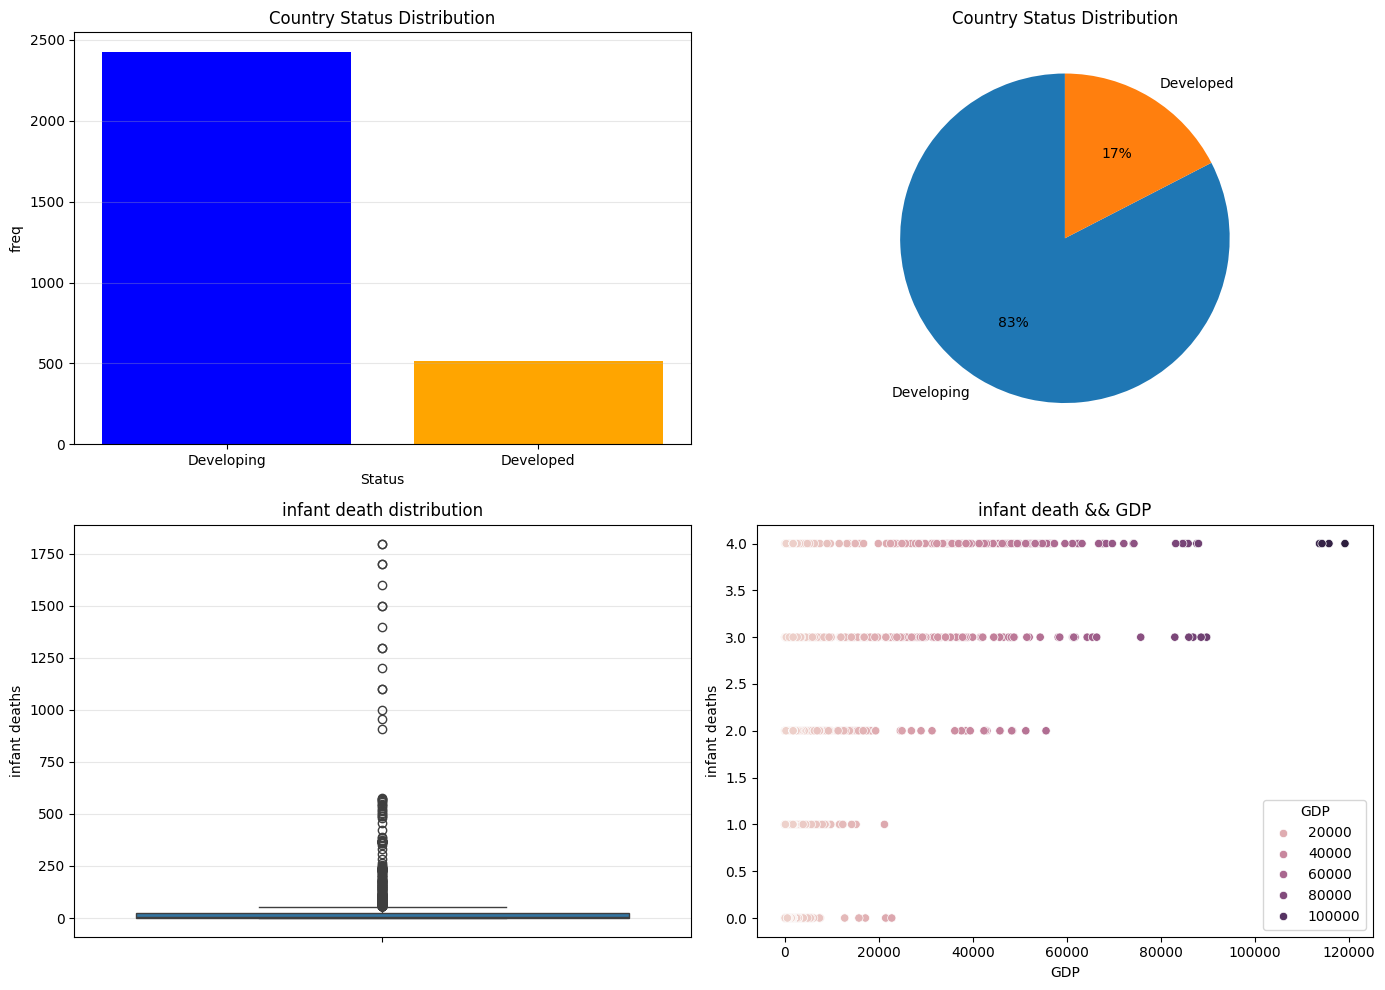

In [106]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
#subplot 1
status_counts = life_data['Status'].value_counts()
axes[0, 0].bar(status_counts.index, status_counts.values,  color=['blue', 'orange'])
axes[0, 0].set_title('Country Status Distribution')
axes[0, 0].set_xlabel('Status', fontsize=10)
axes[0, 0].set_ylabel('freq', fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)

#subplot 2 
status_counts = life_data['Status'].value_counts()
axes[0, 1].pie(status_counts.values, labels=status_counts.index, startangle=90, autopct='%1.0f%%')
axes[0, 1].set_title('Country Status Distribution')

#subplot 3
sns.boxplot(ax=axes[1, 0],y=life_data['infant deaths'])
axes[1, 0].set_title('infant death distribution')
axes[1, 0].grid(axis='y', alpha=0.3)

#subplot4
sns.scatterplot(data=life_data,x="GDP",y="Life expectancy", hue='GDP')
axes[1, 1].set_title('infant death && GDP')
axes[1, 1].set_xlabel('GDP')
axes[1, 1].set_ylabel('infant deaths')

plt.tight_layout()
plt.show()